In [1]:
corpus1_urls = [
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/a_tale_of_two_cities.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/david_copperfield.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/hard_times.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/oliver_twist.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/the_pickwick_papers.txt'
]
corpus1_label = 'Dickens'

corpus2_urls = [
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/emma.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/mansfield_park.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/northanger_abbey.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/persuasion.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/Corpus/sense_and_sensibility.txt' 
]

corpus2_label = 'Austen'

In [2]:
import requests
import os
import re
from os.path import basename

directory = 'Corpus'

if not os.path.exists(directory):
    os.makedirs(directory)
    

def download(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        out = open(file_name,'w',encoding='utf-8')
        out.write(response.text)
        out.close()
        
def download_to_corpus(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        path = os.path.join(directory,file_name)
        out = open(path,'w',encoding='utf-8')
        out.write(response.text)
        out.close()
        
def find_title(file_name):
    title = basename(file_name)
    title = re.sub('%20',' ',title)
    title = re.sub(r'\'','',title)
    title = re.sub('.txt$','',title.strip())
    return title    

def clean_wordlist(words):
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word not in stopwords]
    words = [re.sub(r'([….])|(\')','',word) for word in words]
    words = [word for word in words if re.search(r'\w', word)]
    return words

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

        
import sys
!pip install vaderSentiment
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt_tab')
        
        
download('https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment3/text_mining.py')

for url in corpus1_urls:
    download_to_corpus(url)
    
for url in corpus2_urls:
    download_to_corpus(url)
    
    
out = open('metadata.csv','w',encoding='utf-8')
out.write('text,category\n')
for url in corpus1_urls:
    out.write(f"{find_title(basename(url))},'{corpus1_label}'\n")
for url in corpus2_urls:
    out.write(f"{find_title(basename(url))},'{corpus2_label}'\n")

out.close()


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/verhaarpaf/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
import requests
import re
import os
import string
string.punctuation += '-•“”’– '
from text_mining import *

from os.path import join

from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

stopwords = stopwords.words('english')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()


In [4]:
corpus = os.listdir(directory)
corpus = [os.path.join(directory,text) for text in corpus if re.search(r'txt$',text) and not(re.search(r'lemma',text))]

for text in corpus:
    print(text)
    
metadata = pd.read_csv('metadata.csv')

Corpus/mansfield_park.txt
Corpus/sense_and_sensibility.txt
Corpus/oliver_twist.txt
Corpus/david_copperfield.txt
Corpus/hard_times.txt
Corpus/northanger_abbey.txt
Corpus/persuasion.txt
Corpus/emma.txt
Corpus/the_pickwick_papers.txt
Corpus/a_tale_of_two_cities.txt


## Linguistic features

For each text, the number of characters, the number of words and the number of sentences are calculated. Using these data, we can compare the avarage word lengths and the average sentence lengths of all the novels. 

In [5]:
data = []

for file in corpus:
    print(f'Analysing {file} ... ')
    row = []
    text = open(file,encoding='utf-8')
    full_text = text.read()
    
    # Calculate number of characters (without spaces)
    full_text_no_spaces = re.sub( r'\s','',full_text)
    nr_characters = len(full_text)
    
    # Calculate number of words
    words = word_tokenize(full_text.lower())
    words = remove_punctuation(words)
    nr_tokens = len(words)
    
    avg_word_length = nr_characters / nr_tokens
    
    row.append(nr_tokens)
    row.append(nr_characters)
    row.append(avg_word_length)
    
    sentences = sent_tokenize(full_text)
    nr_sentences = len(sentences)
    row.append(nr_sentences)
    avg_sent_length = nr_tokens/nr_sentences
    
    row.append(avg_sent_length)
    
    first_2000 = words[:2000]
    unique = list(set(first_2000))
    ttr = len(unique)/len(first_2000)
    row.append(ttr)
    
    row.append(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    data.append(row)
    
columns = ['nr_tokens','nr_characters','word_length','nr_sentences','words_per_sentence','ttr','title','category']
df = pd.DataFrame(data, columns = columns)

Analysing Corpus/mansfield_park.txt ... 
Analysing Corpus/sense_and_sensibility.txt ... 
Analysing Corpus/oliver_twist.txt ... 
Analysing Corpus/david_copperfield.txt ... 
Analysing Corpus/hard_times.txt ... 
Analysing Corpus/northanger_abbey.txt ... 
Analysing Corpus/persuasion.txt ... 
Analysing Corpus/emma.txt ... 
Analysing Corpus/the_pickwick_papers.txt ... 
Analysing Corpus/a_tale_of_two_cities.txt ... 


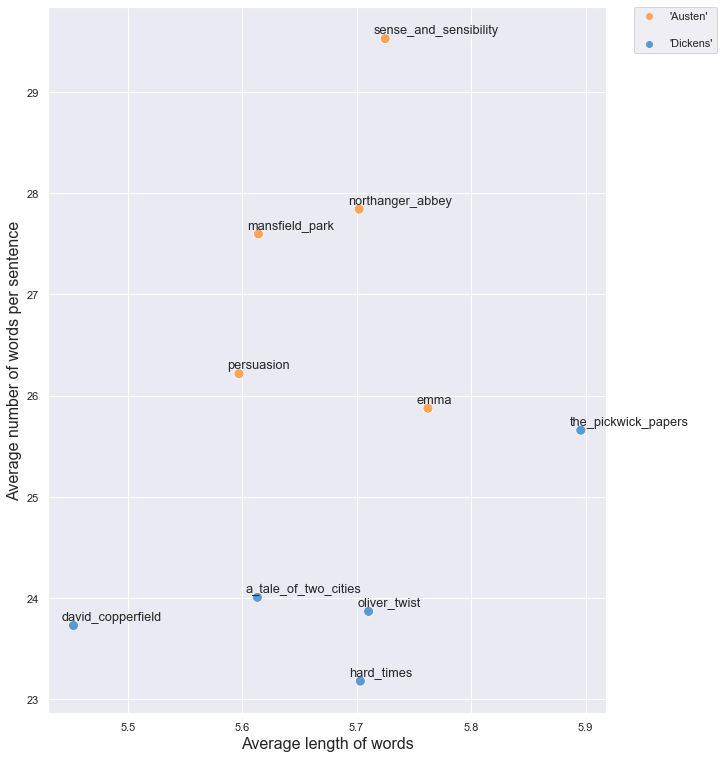

In [6]:
x_axis = 'word_length'
y_axis =  'words_per_sentence'
hue = 'category'

colours = ['#f9a65a','#599ad3']

fig = plt.figure( figsize = ( 10,13 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue = hue,  palette=colours ,  s=100 )

for index, row in df.iterrows():
    plt.text( row[x_axis]-0.01, row[y_axis]+0.05 , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Average length of words'  , fontsize = 16 )
ax.set_ylabel( 'Average number of words per sentence'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Type-token ratio

The type-token ratio can be calculated by dividing the number of unique words (the types) by the total number of words (the tokens). The number gives [an indication of the lexical diversity](https://cdsleiden.github.io/tdm-tutorial/notebooks/5%20Type-token_ratio.html). 

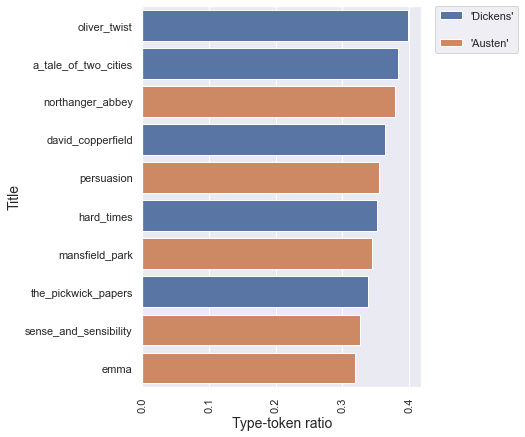

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'ttr'
y_axis = 'title'
hue = 'category'

colours = ['#599ad3','#f9a65a']

fig = plt.figure( figsize=( 5,7 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis, 
                   hue = hue , dodge = False)

#graph.set_title('' , size = 20) 
graph.set_xlabel('Type-token ratio' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.show()

## Most frequent words

The words have been lemmatised first.

In [8]:
for file in os.listdir(directory):
    if re.search( 'lemma.txt',file ):
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            # stopwords and punctuation is removed
            words = clean_wordlist(words)
            freq = Counter(words)
            key = re.sub('_lemma','',path)
            print(f"\n{find_title(key)}\n")
            for word,count in freq.most_common(15):
                print(f'{word} ({count})')


## Unique words

In [9]:
categories = list(metadata['category'].unique())

corpus1 = []
corpus2 = []
corpus1_freq = Counter()
corpus2_freq = Counter()

for text in corpus:
    category = metadata.query( f"text=='{find_title(text)}' " )['category'].values[0]
    if category == categories[0]:
        corpus1.append(text)
    else:
        corpus2.append(text)

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus1_freq.update(words)

    
for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus2_freq.update(words)

In [10]:
print(f'The list below indicates the 20 most frequent words in the {categories[0]} subcorpus.\n')

for word,count in corpus1_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'Dickens' subcorpus.

said => 8883
one => 2828
would => 2559
little => 2482
upon => 2464
pickwick => 2352
old => 2308
sir => 2257
man => 2213
could => 2026
know => 2012
time => 1878
replied => 1713
never => 1621
say => 1570
much => 1540
well => 1522
come => 1500
good => 1479
see => 1452


In [11]:
print(f'The list below indicates the 20 most frequent words in the {categories[1]} subcorpus.\n')

for word,count in corpus2_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'Austen' subcorpus.

could => 3061
would => 2751
must => 1749
said => 1603
much => 1581
miss => 1550
one => 1549
every => 1239
think => 1221
might => 1165
well => 1135
never => 1118
little => 1096
time => 1081
know => 1059
good => 1008
fanny => 963
nothing => 959
without => 871
say => 864


In [12]:
print(f'The following words from the {categories[0]} subcorpus are NEVER used in the {categories[1]} subcorpus\n')

for word,count in corpus1_freq.most_common():
    if word not in corpus2_freq.keys():
        print(word)

The following words from the 'Dickens' subcorpus are NEVER used in the 'Austen' subcorpus

pickwick
weller
micawber
peggotty
winkle
bounderby
copperfield
traddles
dora
agnes
steerforth
bumble
lorry
sikes
wery
murdstone
gradgrind
fagin
defarge
sparsit
bob
wardle
sawyer
uriah
snodgrass
perker
ly
wickfield
wot
pott
bardell
brownlow
davy
rachael
sammy
jingle
pross
heep
manette
barkis
eh
carton
trotwood
spenlow
sissy
darnay
noah
monks
harthouse
fogg
lucie
gen
creakle
r
cruncher
giles
mas
dodson
samuel
omer
monsieur
dodger
ben
wos
afore
serjeant
gummidge
mills
monseigneur
stryver
coketown
arabella
jerry
jip
beadle
maylie
charley
crupp
pell
tellson
trotter
punch
chin
commons
sowerberry
dartle
fur
annie
magnus
stiggins
wooden
nupkins
yer
remarked
david
jury
vith
jack
pound
wi
sydney
retorted
doen
desk
thee
dowler
chillip
jacques
paris
umble
bitzer
grimwig
arter
rubbing
th
twist
mell
benjamin
lobbs
lowten
raddle
corney
matron
sleary
thrust
bag
toby
spinster
mowcher
eatanswill
cluppins
maldon
th

catechism
slime
grunt
sham
reflectively
sharpest
execrations
muffling
mire
hallowed
stunning
turmoil
marshy
latch
slipshod
counterfeit
corkscrew
invoking
outcasts
rag
ass
functionaries
nimble
cowered
grains
quart
telescope
wrapper
twining
bunches
barber
colony
assemblage
volunteered
darkest
crafty
dilated
reassured
wholesale
confirmatory
snail
speckled
chinking
convulsion
warlike
functions
negligently
buttered
throats
taunt
plodding
captured
herd
undertone
loses
mortally
prospered
twisting
impostor
mounds
bible
naked
muster
paving
uncovered
stentorian
replenished
skirted
thereat
bullying
infirmities
impressing
fee
devils
overcast
overhung
facetiousness
narrated
propounded
corked
vivacious
obliterated
craven
dive
overgrown
nudging
mouse
unbeknown
morris
community
wisit
lark
leggings
redress
pat
busying
substituting
deepening
priceless
haunt
burly
irons
bloody
traversing
unaccustomed
horn
deaths
hissing
dived
pumps
wearily
rusted
dishonour
aught
outskirts
thronged
propitiate
torches
torc

blustering
sifting
adornments
ambuscade
thunderstorm
halo
alighting
torpor
unbent
catches
sensitiveness
sneezes
viper
proscribed
wantin
greedily
pitman
bandages
mangled
kills
dyin
riders
emperor
allegory
thtood
performanth
perthon
decrepit
bivouac
portraiture
launches
newsman
pan
religiously
retaliation
version
hereinafter
recognises
plaid
upsetting
werry
clockwork
vork
ponto
donna
christina
foreigners
budger
optics
barracks
inoffensive
trench
winced
scaling
belligerents
taxing
hundredfold
scrawled
scrutinising
recount
unabashed
tested
cartridges
scarfs
contraband
revelry
edging
spilt
punching
lethargic
jollity
chuckles
freemen
negro
wickets
versed
twos
valorous
waylaid
worser
jolting
testy
buckle
slamming
postillions
touts
touter
clarke
colloquy
beheaded
wed
brevity
menagerie
tramping
bustin
hustings
seconder
pugilistic
invidious
denouncing
imperence
repudiate
bilson
slum
lonesome
straps
pricked
refilling
ode
wristbands
benign
adjectives
troubadour
vig
peek
kicks
vaginer
beggars
tapro

ment
economic
chronicle
perwent
shillins
cobblers
nevys
caveat
infernally
appleplexy
athirst
pianner
vurks
wenturs
rybody
carousing
aggrawatin
cabrioily
spaniards
crusted
ironically
ferreted
cottons
cognovit
entreats
wotever
rubbings
soberly
supping
toddy
obscuring
leith
wheelwright
shred
ironwork
cocking
rapier
scabbard
marquess
filletoville
accomplices
unbusinesslike
supremacy
thoroughfares
wharfinger
sentinel
grimaldi
wun
postboys
theirselves
towcester
impeachment
waverer
metaphysics
buffery
responsive
editors
ungrammatical
extinguisher
vater
smirks
rekvire
fixters
inwested
bramah
charcoal
plaiting
inflammable
dockyment
solvent
ackerate
vispered
dewote
someveres
supplicatory
conwiction
imposes
vages
transitory
realise
heralded
traitorous
gaols
greatnesses
mam
flint
encloses
raggedly
bumped
slid
cupids
compatriot
luckier
sawed
billets
grinds
footways
unglazed
overclouded
hailing
recalls
crunches
diseases
pillory
decreed
secrete
briton
disfiguring
evoke
hilary
stint
botheration
mirage

69
73
79
84
94
101
111
105
116
126
136
146
152
156
163
167
172
179
186
193
200
208
216
222
64
100
132
206
underscoring
unaccommodating
innocents
scales
galvanizing
squarely
lustrous
grinders
incisive
antennæ
freckled
pugilist
bolus
fistic
millennium
wheezy
combinations
modifications
syntax
prosody
astronomy
cosmography
peoples
overdone
morgiana
maim
distort
chalking
lecturing
manipulated
dissected
wain
celebrities
hardware
ventilation
clamps
girders
brooms
conchological
mineralogical
ore
piper
pavilion
bray
suffrages
inaugurating
elucidate
throngs
tooley
laughable
trivialities
abasing
analogous
delinquents
brassy
pigsty
sop
collapsed
culmination
dumps
cogent
minerals
somethingological
woefully
strollers
revengefully
malthus
fractions
keynote
uncoiled
piston
workful
birdcage
stuccoed
pinnacles
purchaseable
jangling
organization
teetotal
outdoing
mocha
ratio
rebounded
larruped
drunkards
ethereal
idealities
shabbily
centaur
vaulting
prairies
huntsmen
fondle
bismuth
carmine
cutaway
cheekin

wigilance
elewates
wistlers
wistle
quarts
workmanlike
unbolted
unrecorded
lashing
acterrally
cabmin
perwoked
forgit
pelerine
lovey
prowokin
infantile
imbibing
aggravate
hoffered
slavey
plaintives
montague
agencies
snicks
prosee
pleader
demises
marginal
scamps
fomented
intercede
wrongheaded
restores
liberates
gong
warmheartedness
pleadings
invest
hurra
innockilated
noweres
consolidated
tampering
assassinate
prolongation
cravings
wondrous
experimentalised
testing
antidotes
proceedin
dissection
galwinism
rewivin
depitty
wollatilly
dispassionately
entrap
conspire
abduction
babyhood
objurgation
wether
jolliest
revisited
glimmerings
lunching
noggin
whiskey
seasoned
mac
canny
kippered
finnan
haddocks
haggis
lassies
giggled
brewed
maut
disagreeing
giddiest
shrouding
canongate
chanted
calton
holyrood
royally
woodwork
thinker
renovated
buckram
ruffles
thighs
lunge
fracture
memorialise
missile
espied
swordsman
slicing
troopers
steels
newport
panelling
slaughtering
cockchafer
entail
barmaids
brake

In [13]:
print(f'The following words from the {categories[1]} subcorpus are NEVER used in the {categories[0]} subcorpus\n')

for word,count in corpus2_freq.most_common():
    if word not in corpus1_freq.keys():
        print(word)

The following words from the 'Austen' subcorpus are NEVER used in the 'Dickens' subcorpus

fanny
elinor
crawford
marianne
catherine
harriet
weston
elton
knightley
woodhouse
elliot
bertram
dashwood
jennings
fairfax
wentworth
tilney
rushworth
churchill
willoughby
norris
mansfield
hartfield
thorpe
morland
brandon
walter
musgrove
ferrars
highbury
middleton
barton
cousins
randalls
palmer
eleanor
harville
uppercross
perry
kellynch
yates
lyme
benwick
goddard
croft
sotherton
norland
shew
campbell
portsmouth
donwell
chuse
frederick
taylor
musgroves
hayter
shewed
steele
northanger
dashwoods
bertrams
wallis
enscombe
surprize
shewn
steeles
surprized
maple
dalrymple
delaford
fullerton
cleveland
crofts
campbells
thornton
rebecca
eltons
stopt
woodston
shewing
tilneys
weymouth
middletons
charade
mortifying
allenham
udolpho
harvilles
baronet
curricle
agatha
hawkins
lacey
ireland
complaisance
exeter
combe
morton
harley
milsom
hughes
crawfords
everingham
anhalt
pulteney
vicarage
amelia
enquiries
cobb
nor

maddoxes
prescott
harrison
jellies
heightenings
embody
exhaustless
principled
stanwix
preassured
fidgetings
uncles
mediocrity
unacceptable
imputing
recommendatory
unaccountableness
bearable
driest
operating
incurably
belie
allot
cardinal
cromwell
dramatic
incompetency
modulation
liturgy
redundancies
heterogeneous
undertones
unrepulsable
reurging
worships
perseveres
arming
theoretical
unguardedly
unthinking
inconceivably
unspoilt
guides
laments
revolt
overacting
envyings
heartburnings
standards
ross
equivocal
lieutenants
medicinal
familiarised
unassailed
newbury
seamanship
canopus
squabble
undistinguished
turner
walsh
texel
moorings
endymion
cleopatra
chasing
boatswain
holla
reentered
depose
maxwell
cumbersome
motherbank
injudiciously
reprimanding
dawdle
slattern
disqualified
untameable
petulance
moderated
lascelle
vowel
perchance
pelisses
durability
supine
indefensible
subscriber
propria
chuser
notification
fluctuation
ungentlemanlike
timbers
underhand
undescribable
reckoner
griping
ha

schemed
forestalling
worshipping
fidgetiness
unsullied
f
unceremoniousness
sauciness
discordancies
felling
coddling
graham
wholesomeness
philippics
rumination
dignities
disagreeables
emulate
sheepskin
unpermitted
invites
solicitously
braithwaites
ulcerated
accumulations
whiten
lawfully
inebriety
zigzags
indiscreetly
aggrandise
incongruity
adventuring
discontinuing
unmirthful
thaw
testifying
repellent
finessing
shifts
huswife
deafness
deafer
dublin
7th
holyhead
lieut
infantry
novitiate
refuted
entitling
successless
recantation
provocations
workbags
suitableness
appease
porker
carrot
parsnip
wonderings
buyings
circulate
inseparably
waverings
recurrences
glossed
philip
espalier
solitarily
pencilled
reanimation
overcareful
proportionably
barnes
companionably
hyperbolical
inelegance
disputing
beavers
conquering
foppery
unexpensively
accounting
dews
unspent
moralised
bravado
pitifullest
spinet
testifies
pedal
passant
outrée
improvidently
unostentatious
petticoats
limitations
roundly
touchsto

## Dunning’s log likelihood

One of statistical methods that can be used to find such distinctive words is Dunning’s log likelihood. In short, it analyses the distinctiveness of word in one set of texts compared to the texts in a reference corpus, by calculating probabilities based on word frequencies. A good explanation of the fomula can be found on the [wordHoard](https://wordhoard.northwestern.edu/userman/analysis-comparewords.html#loglike) website.

Using the frequencies that have been calculated above, the Dunning log likelihood scores are calculated for all of the words that occur both in corpus1 and corpus2 in the cell below. The actual calculation takes place in a method named `log_likelihood()`. The scores that are calculated are all stored in a dictionary named ll_scores

The formula that is implemented in the log_likelihood method returns a number which can either be positive or negative. A postive score indicates that there is a high probability that the word will be used in the first corpus. A negative probability indicates that occurence of the word is more common in the second corpus. The tokens that are assigned the highest scores, in other words, are also most distincive of the first corpus.

The code below lists the words that are assigned a positive log likelihood score in the first corpus.

See also [TDM tutorial, chapter on Diction](https://cdsleiden.github.io/tdm-tutorial/notebooks/9%20Diction.html)

In [14]:
total1 = sum(corpus1_freq.values())
total2 = sum(corpus2_freq.values())

In [15]:
ll_scores = dict()


for word in corpus1_freq.keys():
    if word in corpus2_freq.keys():

        ll_score = log_likelihood( corpus1_freq[word] , corpus2_freq[word] , total1 , total2 )
        ll_scores[word] = ll_score

max = 25
i = 0 
        

In [16]:
print(f'The following words are most distinctive in the {categories[0]} subcorpus\n')


for word in sorted_by_value(ll_scores , ascending = False ):
    print( word , ll_scores[word] )
    i += 1
    if i == max: 
        break  

The following words are most distinctive in the 'Dickens' subcorpus

said 2051.0988912128128
sam 919.172786111536
old 848.5527037830456
oliver 736.2536752390824
doctor 523.5431795907955
face 507.58438920078214
boy 496.5135588926823
gentleman 484.62280176904477
head 461.00192885613916
em 457.1308830448329
replied 449.86675123604766
hand 414.8789208911234
upon 411.19947641078124
inquired 322.7473831954588
night 285.44989084318007
tupman 272.00859855563493
jew 266.87506034550273
ha 260.5562618117829
master 245.8009646163694
hands 224.55017672472255
door 219.30226723212922
eyes 190.77877111464096
hat 183.19929742234729
rejoined 181.72677497479685
got 176.4950651253642


In [17]:
print(f'The following words are most distinctive in the {categories[1]} subcorpus\n')

max = 25
i = 0 

for word in sorted_by_value(ll_scores ) :
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break   

The following words are most distinctive in the 'Austen' subcorpus

emma -1509.609409115036
could -1331.9750387738402
must -1008.7295332558633
anne -1004.6463565854916
edmund -841.2837634449467
would -626.2076706756661
every -611.5251745177957
miss -588.1630458297271
soon -538.6526505129832
sister -511.08009545844334
henry -499.2998904327387
edward -439.41887387788495
jane -422.66130692471677
isabella -407.44103439994285
captain -394.1578582861483
colonel -380.977538808964
mrs -378.00355656130347
lucy -376.7983941814167
feelings -363.04215241886965
thomas -362.92478229658974
john -362.27634370240185
frank -360.89974285163436
however -329.2341492895442
much -320.05401779666624
smith -306.547353870227


## Bigrams

In [18]:
import nltk
from nltk.util import ngrams

bigrams = Counter()

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])
    
for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

said pickwick => 587
sir said => 503
old gentleman => 319
said sam => 315
sir replied => 292
said aunt => 223
young lady => 214
bob sawyer => 210
old lady => 208
em ly => 202
miss murdstone => 179
well said => 175
said old => 175
dear said => 169
young man => 169
said peggotty => 168
said micawber => 167
said weller => 162
dear sir => 158


In [19]:
bigrams = Counter()

for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])
    
for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

sir thomas => 327
miss crawford => 263
every thing => 199
captain wentworth => 194
great deal => 187
young man => 180
mr elliot => 174
miss woodhouse => 157
dare say => 154
lady russell => 146
every body => 143
frank churchill => 141
lady bertram => 132
sir walter => 129
colonel brandon => 127
miss fairfax => 119
sir john => 111
miss bates => 108
jane fairfax => 100


## Part of Speech tagging and Lemmatisation

In [20]:


data = []
all_novels = []
lemmatiser = WordNetLemmatizer()

# Dictionaries to save all nouns, adjectives, adverbs and nouns 
all_adj_adv_noun = dict()
all_verbs = dict()

adj_noun_pos = ['JJ','JJR','RB','RDR','RBS','NN','NNS','NNP']
verbs_pos = ['VB','VBD','VBG','VBN']

# Dictionary to save number of tokens
nr_tokens = dict()

for file in corpus:
    lemmatised = ''
    pos_tags = dict()

    # Pos categories in the current text
    adj_adv_noun = []
    verbs = []
    
    count_tokens = 0
    
    out_file = re.sub( r'\.txt$' , '_lemma.txt', file)
    
    print(f'Analysing {file} ... ')

    text = open(file,encoding='utf-8')
    full_text = text.read()
    sentences = sent_tokenize(full_text)
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = clean_wordlist(words)
        pos = pos_tag(words)

        for i,word in enumerate(words):
            word = word.lower()

            pos_tags[pos[i][1]] = pos_tags.get(pos[i][1],0)+1
                       
            posTag = ptb_to_wordnet( pos[i][1] )
            if re.search( r'\w+' , posTag , re.IGNORECASE ):
                lemma = lemmatiser.lemmatize( words[i] , posTag )
                lemmatised += lemma + ' '
                count_tokens += 1
                
                if len(lemma)>0:
                
                    if pos[i][1] in adj_noun_pos:
                        adj_adv_noun.append(lemma.lower())
                    if pos[i][1] in verbs_pos:
                        verbs.append(lemma.lower())

        lemmatised += '\n'
    
    all_adj_adv_noun[file] = adj_adv_noun
    all_verbs[file] = verbs
    nr_tokens[file] = count_tokens
    all_novels.append(file)
        
    with open(out_file,'w',encoding='utf-8') as out:
        out.write(lemmatised)
        
    
    total = sum(pos_tags.values())
    row = []
    row.append(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    row.append(pos_tags.get('MD',0)/total)
    row.append(pos_tags.get('FW',0)/total)
    row.append(pos_tags.get('JJ',0)/total)
    row.append((pos_tags.get('JJR',0)+pos_tags.get('JJS',0))/total)
    row.append(pos_tags.get('RB',0)/total)
    row.append((pos_tags.get('RBR',0)+pos_tags.get('RBS',0))/total)
    data.append(row)

df_pos = pd.DataFrame(data,columns=['title','category','modal_verb','foreign_word','adj','adj-comp-super','adv','adv-comp-super'])


Analysing Corpus/mansfield_park.txt ... 
Analysing Corpus/sense_and_sensibility.txt ... 
Analysing Corpus/oliver_twist.txt ... 
Analysing Corpus/david_copperfield.txt ... 
Analysing Corpus/hard_times.txt ... 
Analysing Corpus/northanger_abbey.txt ... 
Analysing Corpus/persuasion.txt ... 
Analysing Corpus/emma.txt ... 
Analysing Corpus/the_pickwick_papers.txt ... 
Analysing Corpus/a_tale_of_two_cities.txt ... 


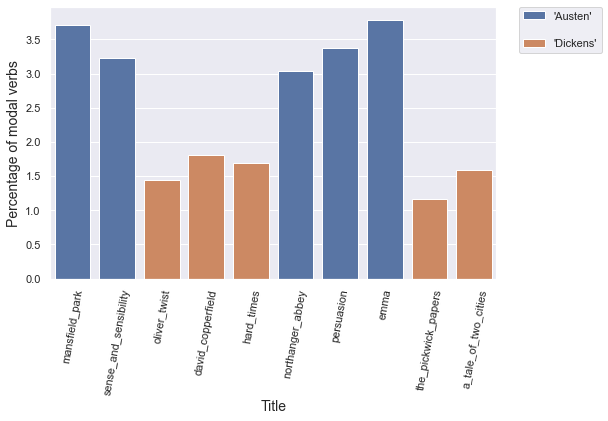

In [21]:
df_pos['modal_verb'] = df_pos['modal_verb']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='modal_verb', 
                   hue = 'category', dodge = False)

#graph.set_title('' , size = 20) 
graph.set_xlabel('Title' , size = 14) 
graph.set_ylabel('Percentage of modal verbs' , size = 14 )

plt.xticks(rotation=80)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

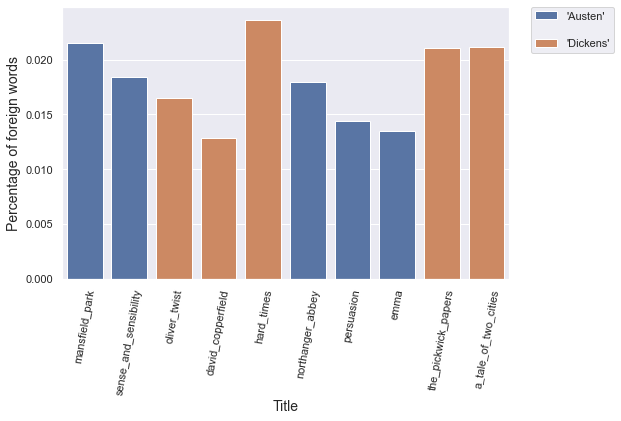

In [22]:
df_pos['foreign_word'] = df_pos['foreign_word']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='foreign_word', 
                    hue = 'category' , dodge = False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Title' , size = 14) 
graph.set_ylabel('Percentage of foreign words' , size = 14 )

plt.xticks(rotation=80)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

In [23]:
df_pos['adj-comp-super'] = df_pos['adj-comp-super']*100
df_pos['adj'] = df_pos['adj']*100
df_pos['adv-comp-super'] = df_pos['adv-comp-super']*100
df_pos['adv'] = df_pos['adv']*100

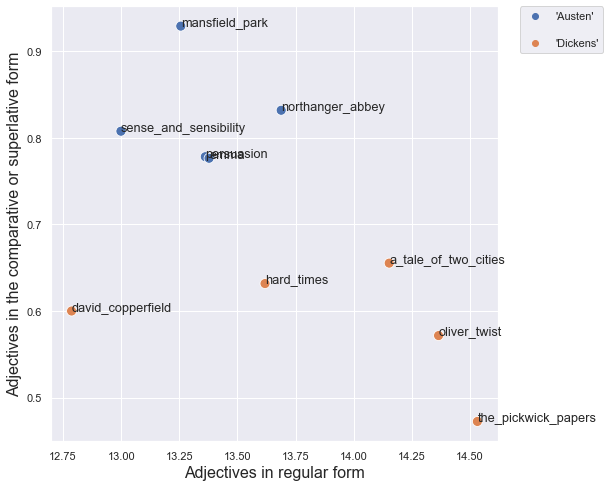

In [24]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adj'
y_axis='adj-comp-super'

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,  
                     hue = 'category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis], row['title'] , fontsize=12.8)

ax.set_xlabel( 'Adjectives in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adjectives in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

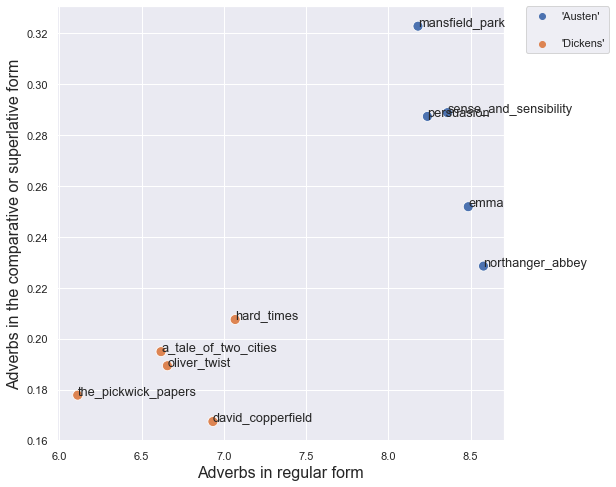

In [25]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adv'
y_axis='adv-comp-super'

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,  
                     hue='category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Adverbs in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adverbs in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

## Hypernyms

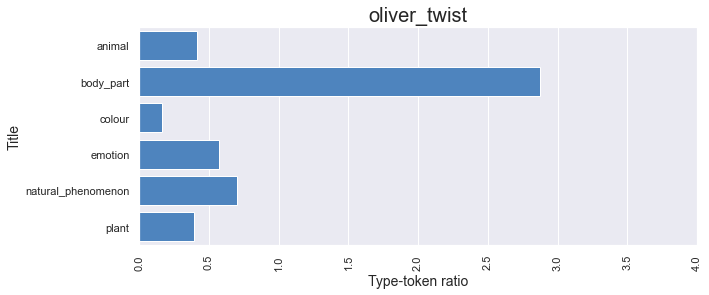



Most common emotions in "oliver_twist"

fear (69); love (53); alarm (30); happiness (28); fit (22); joy (17); terror (16); rage (15); horror (13); excitement (12); wrath (11); shudder (10); dread (9); hatred (9); hate (9); 

Most common colours in "oliver_twist"

black (31); red (27); green (25); blue (11); drab (8); sanguine (4); paleness (4); yellow (3); brown (3); crimson (2); tint (1); whiteness (1); gray (1); 

Most common body_parts in "oliver_twist"

hand (331); eye (264); head (242); back (242); face (212); small (92); arm (82); foot (77); shoulder (44); ear (43); lip (36); mouth (31); knee (29); nose (26); throat (24); 

Most common natural phenomena in "oliver_twist"

light (115); low (80); quiet (36); thrust (35); wind (28); drag (25); exchange (23); smoke (21); rain (18); interrupt (16); energy (12); deposit (10); cloud (9); gravity (9); bolt (8); 

Most common animals in "oliver_twist"

dog (91); bear (53); female (17); horse (17); fly (13); male (9); bird (9); mount (8)

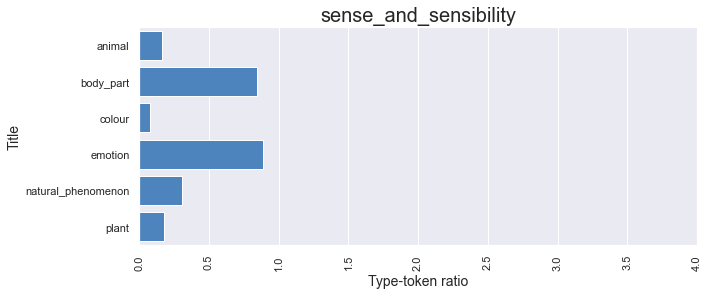



Most common emotions in "sense_and_sensibility"

love (93); happiness (65); fear (49); spite (35); joy (25); alarm (23); temper (16); fit (10); dread (10); uneasiness (9); indignation (9); resentment (8); horror (6); apprehension (6); suspense (6); 

Most common colours in "sense_and_sensibility"

complexion (9); red (6); gray (6); sanguine (5); green (3); crimson (2); black (2); brown (2); blue (1); paleness (1); pink (1); 

Most common body_parts in "sense_and_sensibility"

eye (77); hand (58); small (48); fanny (48); back (40); head (36); face (26); lip (10); ear (9); quick (8); arm (6); foot (5); cheek (5); shoulder (4); behind (4); 

Most common natural phenomena in "sense_and_sensibility"

low (27); quiet (19); weather (19); rain (13); light (12); attraction (9); wind (9); exchange (7); interrupt (7); gravity (5); energy (4); bond (4); mildness (3); cloud (3); reluctance (2); 

Most common animals in "sense_and_sensibility"

bear (34); horse (19); female (2); entire (2); rat (2

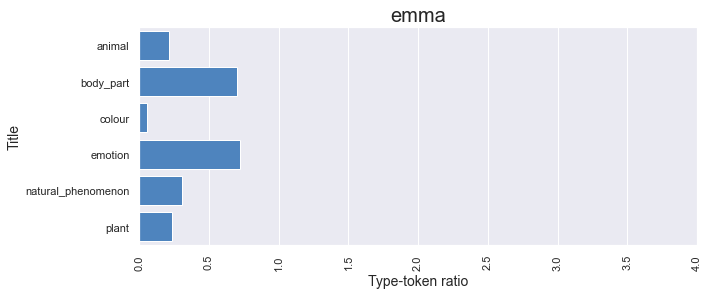



Most common emotions in "emma"

love (136); happiness (74); fear (35); alarm (29); temper (26); spite (24); joy (17); fit (15); dread (11); uneasiness (9); resentment (9); horror (9); anger (7); apprehension (7); indignation (7); 

Most common colours in "emma"

complexion (12); sanguine (7); black (5); blue (4); yellow (3); red (1); scarlet (1); green (1); brown (1); pink (1); coral (1); purple (1); 

Most common body_parts in "emma"

hand (78); eye (74); back (65); small (46); head (38); face (34); quick (24); arm (14); throat (10); foot (9); tongue (9); lip (7); brain (7); nerve (6); cheek (6); 

Most common natural phenomena in "emma"

weather (38); quiet (25); low (24); rain (21); snow (21); light (14); heat (10); attraction (9); interrupt (7); exchange (4); reluctance (3); energy (3); storm (3); cloud (3); candlelight (2); 

Most common animals in "emma"

bear (59); horse (30); female (9); fly (9); entire (8); cow (4); shark (4); mount (3); mare (2); stray (2); puppy (2); mule 

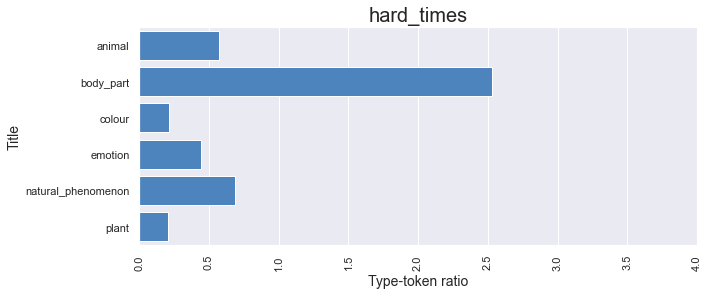



Most common emotions in "hard_times"

love (52); fear (25); fit (13); dread (10); hate (9); happiness (9); spite (7); anger (7); indignation (5); resentment (5); alarm (5); temper (4); shudder (4); suspense (4); quiver (3); 

Most common colours in "hard_times"

black (43); red (26); green (8); blue (6); gray (4); complexion (3); purple (2); sanguine (2); crimson (2); carmine (1); iron-grey (1); blackness (1); pink (1); 

Most common body_parts in "hard_times"

hand (194); face (166); eye (149); head (138); back (103); arm (52); foot (38); leg (28); small (28); lip (22); nose (17); mouth (17); shoulder (17); quick (16); forehead (15); 

Most common natural phenomena in "hard_times"

light (77); low (35); quiet (35); smoke (28); rain (20); wind (17); heat (12); weather (10); chop (5); interrupt (5); storm (4); drag (4); cloud (4); mist (3); dew (3); 

Most common animals in "hard_times"

whelp (42); dog (41); horse (37); bear (35); bird (8); female (8); cow (6); elephant (6); serpent 

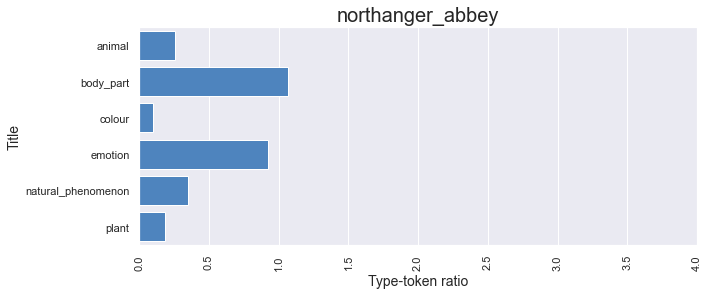



Most common emotions in "northanger_abbey"

love (59); happiness (37); alarm (29); fear (24); spite (15); dread (11); fit (10); resentment (9); horror (8); terror (8); joy (8); hate (7); temper (6); envy (6); uneasiness (6); 

Most common colours in "northanger_abbey"

black (9); green (6); complexion (5); yellow (3); ebony (3); blue (2); purple (2); gray (1); paleness (1); red (1); sanguine (1); 

Most common body_parts in "northanger_abbey"

eye (72); back (48); hand (44); head (34); small (33); arm (20); face (19); quick (11); chest (10); cheek (7); lip (6); ear (5); alas (5); lid (5); horseback (3); 

Most common natural phenomena in "northanger_abbey"

light (20); rain (17); wind (13); weather (10); quiet (9); low (8); exchange (5); ray (5); storm (5); gust (3); cloud (2); torrent (2); bolt (2); sunshine (2); attraction (2); 

Most common animals in "northanger_abbey"

horse (33); bear (12); female (11); fly (5); mount (3); entire (2); puppy (2); hereford (2); terrier (2); dog (

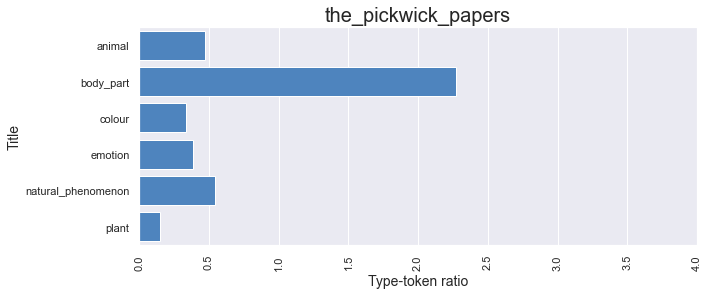



Most common emotions in "the_pickwick_papers"

love (55); fear (50); alarm (45); indignation (38); excitement (36); fit (34); happiness (34); joy (22); horror (19); rage (16); envy (15); wrath (14); gratification (14); terror (13); apprehension (12); 

Most common colours in "the_pickwick_papers"

black (105); blue (89); red (85); green (75); gray (34); brown (28); yellow (23); pink (16); crimson (14); drab (12); sky-blue (7); purple (6); complexion (5); tint (4); claret (3); 

Most common body_parts in "the_pickwick_papers"

hand (540); head (436); eye (414); face (310); back (275); small (164); arm (155); foot (107); trotter (92); leg (84); ear (65); nose (58); shoulder (56); lip (47); mouth (45); 

Most common natural phenomena in "the_pickwick_papers"

light (149); low (84); quiet (57); thrust (51); smoke (45); wind (36); drag (34); deposit (32); energy (30); interrupt (30); exchange (24); cloud (24); rain (21); bolt (19); gravity (18); 

Most common animals in "the_pickwick_pape

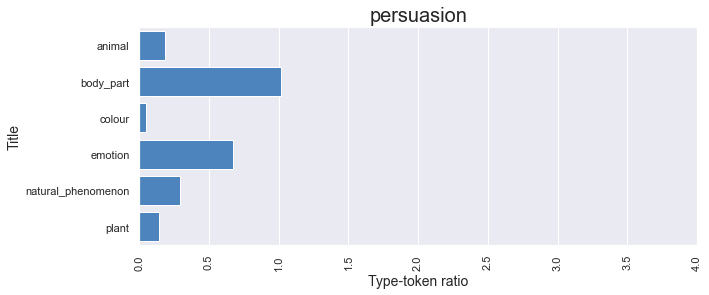



Most common emotions in "persuasion"

love (55); happiness (32); fear (16); fit (12); alarm (11); spite (11); temper (10); suspense (10); gratification (8); dread (8); horror (7); jealousy (6); apprehension (5); joy (5); hate (4); 

Most common colours in "persuasion"

black (5); complexion (4); sanguine (2); blue (2); red (2); brown (1); green (1); 

Most common body_parts in "persuasion"

back (69); eye (55); hand (44); head (40); small (31); face (25); arm (16); quick (9); nerve (9); foot (9); cheek (8); ala (4); fanny (4); mouth (3); behind (3); 

Most common natural phenomena in "persuasion"

low (19); quiet (16); rain (11); weather (10); light (8); attraction (7); interrupt (7); wind (4); storm (2); smoke (2); mildness (2); exchange (2); heat (2); cloud (2); gale (1); 

Most common animals in "persuasion"

bear (28); horse (13); asp (6); female (5); dog (3); fly (3); entire (2); rat (2); crow (1); male (1); sheep (1); mankind (1); sparrow (1); 

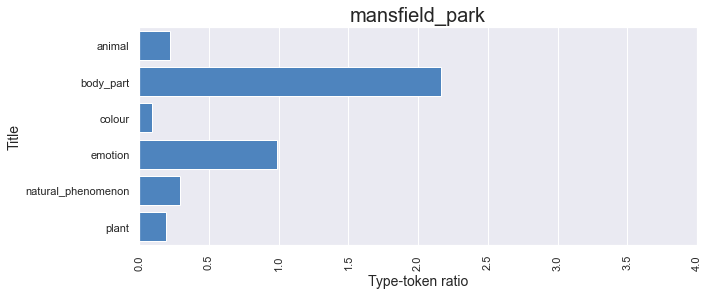



Most common emotions in "mansfield_park"

love (156); happiness (86); fear (59); spite (35); temper (33); alarm (32); fit (28); joy (17); vexation (16); anger (15); dread (14); jealousy (12); envy (12); displeasure (11); resentment (10); 

Most common colours in "mansfield_park"

sanguine (12); complexion (9); green (9); black (8); red (5); brown (3); blue (3); pink (3); scarlet (2); paleness (2); claret (1); crimson (1); purple (1); yellow (1); amber (1); 

Most common body_parts in "mansfield_park"

fanny (919); eye (91); hand (88); back (82); small (58); head (51); face (28); quick (20); arm (15); foot (11); nerve (7); lip (6); extremity (4); cheek (4); horseback (4); 

Most common natural phenomena in "mansfield_park"

quiet (30); light (30); low (24); weather (20); gravity (9); wind (9); interrupt (8); cloud (8); heat (7); reluctance (7); attraction (6); rain (6); exchange (4); energy (4); snow (3); 

Most common animals in "mansfield_park"

bear (42); horse (38); pheasant (9); 

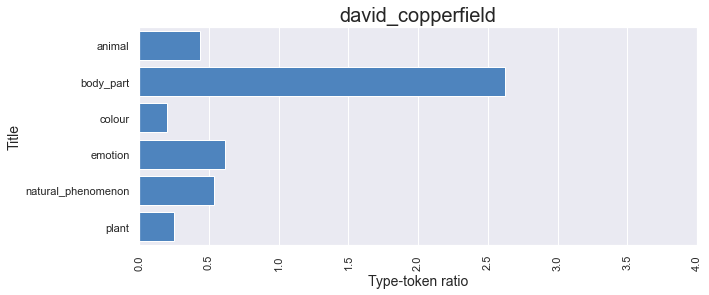



Most common emotions in "david_copperfield"

love (368); fear (60); happiness (55); fit (42); joy (41); dread (34); alarm (31); apprehension (29); excitement (18); spite (17); uneasiness (16); devotion (15); temper (14); indignation (12); horror (10); 

Most common colours in "david_copperfield"

black (77); red (71); blue (46); green (41); brown (19); complexion (9); sanguine (7); gray (7); yellow (6); fawn (5); pink (5); sky-blue (3); drab (2); scarlet (2); coral (1); 

Most common body_parts in "david_copperfield"

hand (723); head (505); face (473); eye (439); back (402); arm (220); foot (102); small (90); shoulder (76); lip (63); ear (55); leg (55); breast (54); chin (52); knee (48); 

Most common natural phenomena in "david_copperfield"

light (184); low (107); quiet (89); wind (60); smoke (31); cloud (27); weather (25); rain (19); snow (19); exchange (16); energy (15); heat (14); interrupt (14); storm (13); chop (12); 

Most common animals in "david_copperfield"

bear (121); h

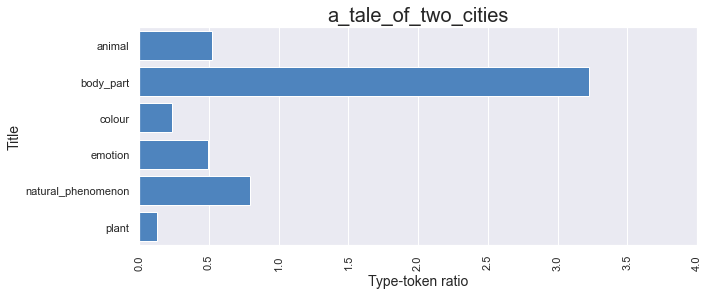



Most common emotions in "a_tale_of_two_cities"

love (76); fear (33); dread (20); fit (14); alarm (13); terror (12); happiness (12); horror (11); uneasiness (9); anger (7); apprehension (7); suspense (6); joy (5); shudder (4); furies (4); 

Most common colours in "a_tale_of_two_cities"

red (52); black (37); blue (18); brown (12); green (5); yellow (5); complexion (5); paleness (3); whiteness (2); crimson (2); claret (1); fawn (1); purple (1); sanguine (1); 

Most common body_parts in "a_tale_of_two_cities"

hand (373); face (242); head (213); eye (193); back (136); arm (122); foot (67); breast (55); finger (51); shoulder (49); small (43); lip (42); ear (29); mouth (25); quick (24); 

Most common natural phenomena in "a_tale_of_two_cities"

light (123); low (62); quiet (41); wind (28); smoke (21); rain (18); storm (17); mist (17); cloud (16); drag (11); weather (9); lightning (8); hail (7); ray (7); heat (7); 

Most common animals in "a_tale_of_two_cities"

horse (58); bear (48); dog

In [26]:
import warnings
warnings.filterwarnings("ignore")

def wordnet_hypernyms(token):
    all_hypernyms = []
    black_list = ['queen','young','human']
    
    if token not in black_list:
        
        word_senses = wn.synsets(token)

        hypernyms = lambda s: s.hypernyms()

        return_value = False

        for ws in word_senses:

            hypernyms = [hyp.name() for hyp in list(ws.closure(hypernyms))]

            if 'plant.n.02' in hypernyms:
                all_hypernyms.append('plant')
            if 'color.n.01' in hypernyms:
                all_hypernyms.append('colour')
            if 'emotion.n.01' in hypernyms:
                all_hypernyms.append('emotion')
            if 'animal.n.01' in hypernyms:
                all_hypernyms.append('animal')
            if 'natural_phenomenon.n.01' in hypernyms:
                all_hypernyms.append('natural_phenomenon')
            if 'body_part.n.01' in hypernyms:
                all_hypernyms.append('body_part')
                                    
    return all_hypernyms

for file in os.listdir(directory):
    
    if re.search( 'lemma.txt',file ):
        data = []
        
        key = os.path.join(directory,re.sub('_lemma','',file))
        title = find_title(key)
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            words = clean_wordlist(words)
            freq = Counter(words)

            for word,count in freq.most_common():
                hypernyms = wordnet_hypernyms(word)
                if len(hypernyms)>0:
                    for h in hypernyms:
                        row = []
                        row.append(word)
                        row.append(h)
                        row.append(count)
                        data.append(row)
                        
        df = pd.DataFrame(data,columns=['word','domain','count'])
                        
                        

        x_axis = list(df.groupby('domain')['count'].sum().to_dict().values())
        # normalise values
        x_axis = [(value/nr_tokens[key])*100 for value in x_axis]
        y_axis = list(df.groupby('domain')['count'].sum().to_dict().keys())
                                
        colours = ['#599ad3','#f9a65a']

        fig = plt.figure( figsize=( 10,4 ) )

        graph = sns.barplot( x=x_axis, y=y_axis, 
                            color = '#3b83d1' , dodge = False)

        graph.set_title(title , size = 20) 
        graph.set_xlabel('Type-token ratio' , size = 14) 
        graph.set_ylabel('Title' , size = 14 )
        
        graph.set_xlim(0,4)


        plt.xticks(rotation= 90)

        plt.show()
        
        print(f'\n\nMost common emotions in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="emotion" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
                
        print(f'\n\nMost common colours in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="colour" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        print(f'\n\nMost common body_parts in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="body_part" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        
        print(f'\n\nMost common natural phenomena in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="natural_phenomenon" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        print(f'\n\nMost common animals in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="animal" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
                

## Sentiment analysis

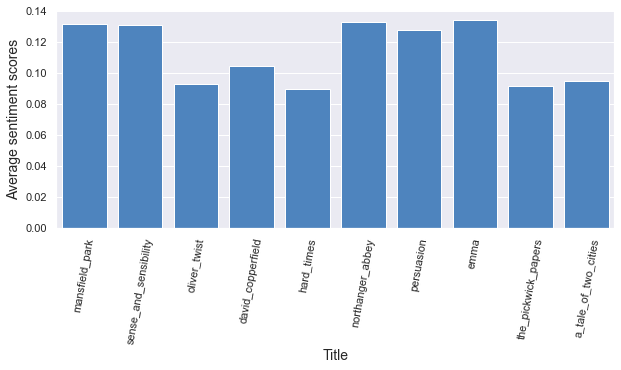

In [27]:

def average_score(file):
    all_scores = []
    file = open( file , encoding = 'utf-8' )
    full_text = file.read()
    sentences = sent_tokenize( full_text )
    for s in sentences:
        scores = ana.polarity_scores(s)
        all_scores.append( scores["pos"] )
    return sum(all_scores)/len(all_scores)
        
sent_scores = dict()

for text in corpus:

    avg_score = average_score(text)
    sent_scores[text]=avg_score
    
    
x_axis = list(sent_scores.keys())
y_axis = list(sent_scores.values())

x_axis = [find_title(text) for text in x_axis]

fig = plt.figure( figsize=( 10,4 ) )

graph = sns.barplot( x=x_axis, y=y_axis, 
                    color = '#3b83d1' , dodge = False )

#graph.set_title( '' , size = 20) 
graph.set_xlabel('Title' , size = 14 )
graph.set_ylabel('Average sentiment scores' , size = 14) 


plt.xticks(rotation= 80)

plt.show()